In [136]:
import matplotlib.pyplot as plt
import sympy as sy
import numpy as np
yt, t = sy.symbols("yt, t")
v0 = 10
g = 9.81
t_vals = np.linspace(0, 2.038735*10, 1000)

In [137]:
yt = v0*t - g/2 * t**2
vt = sy.diff(yt, t)
yt_lam = sy.lambdify(t, yt, "numpy")
vt_lam = sy.lambdify(t, vt, "numpy")

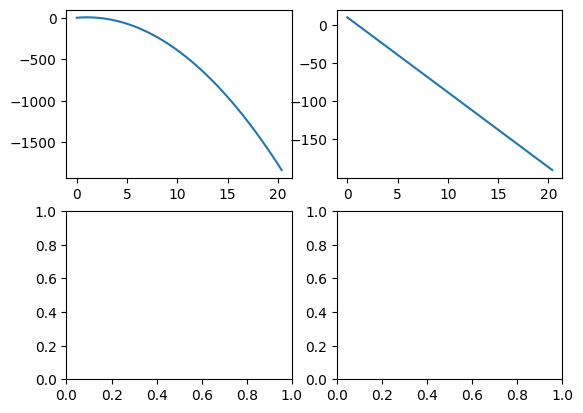

In [138]:
figure, axis = plt.subplots(2, 2)
axis[0,0].plot(t_vals, yt_lam(t_vals), linestyle="-")
axis[0,1].plot(t_vals, vt_lam(t_vals), linestyle="-")

In [139]:
sy.nsolve(vt, t, 0)

1.01936799184506

In [140]:
yt_lam(1.01) #Vmax aos 1.01936 segundos

5.096409499999999

In [141]:
sy.nsolve(yt, t, 1) #instante a que volta à pos inicial

2.03873598369011

In [142]:
T_final = 2.038735*20
n = 10000
dt = T_final/n
vt2 = np.zeros(n)
vt2[0] = 10
yt2 = np.zeros(n)
t2 = np.linspace(0, T_final, n) 
maxv = 100/3.6
t0=-1

In [143]:
for i in range(n-1):
    if(abs(vt2[i])<(maxv)):
        yt2[i+1]=yt2[i]+vt2[i]*dt
        vt2[i+1]=vt2[i]-g*dt
        t2[i+1]=t2[i]+dt
    else:
        yt2[i+1]=yt2[i]-maxv*dt
        vt2[i+1]=-maxv
        t2[i+1]=t2[i]+dt
    if(yt2[i]*yt2[i+1]<0):
        t0= (i+i+1)/2


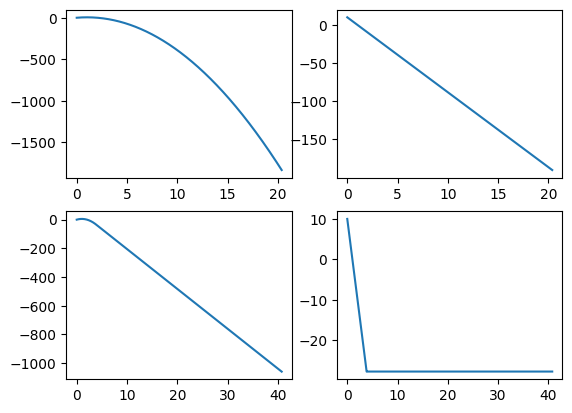

In [144]:
axis[1,0].plot(t2, yt2, linestyle="-")
axis[1,1].plot(t2, vt2, linestyle="-")
figure

In [145]:
np.max(yt2)
np.where(yt2==np.max(yt2))

(array([251], dtype=int64),)

In [146]:
yt2[5001]

-493.61141548410205

In [147]:
t0

501.5